# PCA用于面部数据

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook",style="white")

import numpy as np
import pandas as pd
import scipy.io as sio

In [2]:
mat = sio.loadmat('./data/ex7faces.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [3]:
X = np.array([x.reshape((32, 32)).T.reshape(1024) for x in mat.get('X')])
X.shape

(5000, 1024)

In [11]:
# support functions
def plot_n_image(X, n):
    # plot first n images n has to be a square number
    pic_size = int(np.sqrt(X.shape[1]))
    grid_size = int(np.sqrt(n))
    
    first_n_iamge = X[:n, :]
    
    fig, ax_array = plt.subplots(nrows=grid_size, ncols=grid_size, sharey=True, sharex=True, figsize=(8, 8))
    
    for r in range(grid_size):
        for c in range(grid_size):
            ax_array[r, c].imshow(first_n_iamge[grid_size * r + c].reshape((pic_size, pic_size)))
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
            
# PCA fcunctions
def covariance_matrix(x):
    m = X.shape[0]
    return (X.T @ X) / m

def normalize(x):
    X_copy = X.copy()
    m, n = X_copy.shape
    
    for col in range(n):
        X_copy[:, col] = (X_copy[:, col] - X_copy[:, col].mean()) / X_copy[:, col].std()
        
    return X_copy

def pca(x):
    # 1. normalize data
    X_norm = normalize(X)
    
    # 2. claculate covariance matrix
    Sigma = covariance_matrix(X_norm) # (n, n)
    
    # 3. do singular value decomposition
    U, S, V = np.linalg.svd(Sigma)
    
    return U, S, V

def project_data(X, U, k):
        m, n  = X.shape
        
        if k > n:
            raise ValueError('k should be lower dimension of n')
            
        return X @ U[:, :k]
    
def recover_data(Z, U):
    m, n = Z.shape
    
    if n >= U.shape[0]:
        raise ValueError('Z dimension is >= U, you should recover from lower dimension to higher')
        
    return Z @ U[:, :n].T

you do this do rotate the face clockwise 90 degree, I don't know why every pic I got from .mat file is in wrong orientation

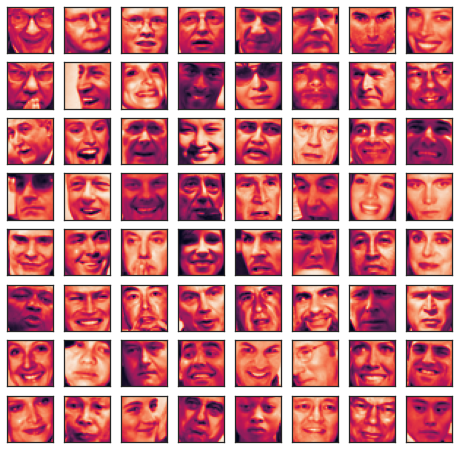

In [9]:
plot_n_image(X, n=64)
plt.show()

# run PCA, find principle components

In [12]:
U, _, _ = pca(X)

In [13]:
U.shape

(1024, 1024)

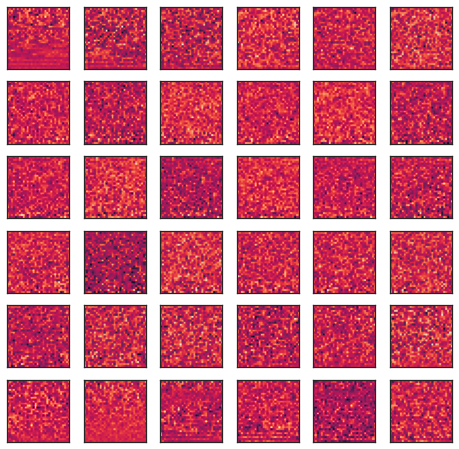

In [14]:
# didn't see face in principle components
plot_n_image(U, n=36)
plt.show()

# reduce dimension to k=100

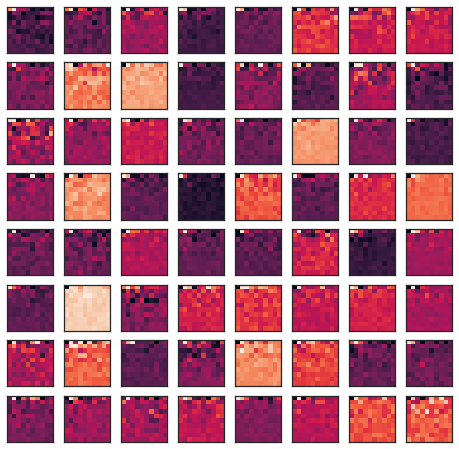

In [15]:
# no face in projected dimension too
Z = project_data(X, U, k=100)
plot_n_image(Z, n=64)
plt.show()

# recover from k=100

you lost some detail, but... they are strikingly similar

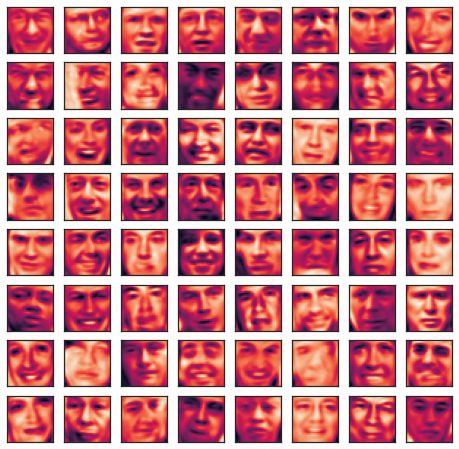

In [16]:
X_recover = recover_data(Z, U)
plot_n_image(X_recover, n=64)
plt.show()

# sklearn PCA

In [17]:
from sklearn.decomposition import PCA

In [18]:
sk_pca = PCA(n_components=100)

In [20]:
Z = sk_pca.fit_transform(X)
Z.shape

(5000, 100)

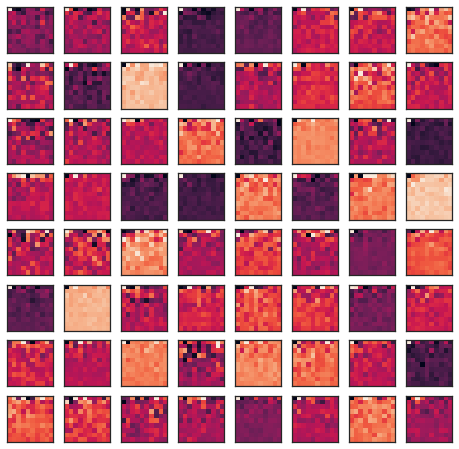

In [21]:
plot_n_image(Z, 64)
plt.show()

In [22]:
X_recover = sk_pca.inverse_transform(Z)
X_recover.shape

(5000, 1024)

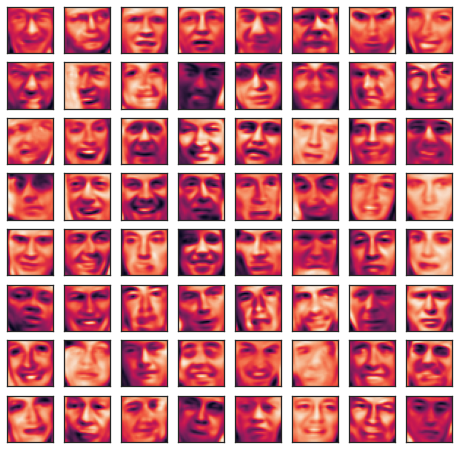

In [23]:
plot_n_image(X_recover, n=64)
plt.show()